In [1]:
%pip install scikit-learn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v3 import preprocess_input 
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler  # Fix import statement
# to prevent unnecessary warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# TensorFlow and tf.keras
import tensorflow as tf

from pathlib import Path

#import useful module for keras library
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam
from keras.losses import SparseCategoricalCrossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

# get modules from sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import random
import pandas as pd

2023-12-27 15:17:21.194131: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-27 15:17:21.194233: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-27 15:17:21.195631: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-27 15:17:21.204789: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-27 15:17:22.102510: W tensorflow/compiler/tf2

In [3]:
import cv2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('metadata - standardized.csv')

In [4]:
data.columns

Index(['names', 'types', 'type_expanded', 'isColor', 'original_name',
       'patient_id', 'fundus', 'fundus_od_seg', 'fundus_oc_seg', 'bv_seg',
       'artery_seg', 'vein_seg', 'oct', 'oct_oc_seg', 'oct_od_seg', 'sex',
       'gender', 'age', 'eye', 'sbp', 'dbp', 'hr', 'iop', 'vcdr',
       'Unnamed: 24', 'notchI_present', 'notchS_present', 'notchN_present',
       'notchT_present', 'expert1_grade', 'expert2_grade', 'expert3_grade',
       'expert4_grade', 'expert5_grade', 'cdr_avg', 'cdr_expert1',
       'cdr_expert2', 'cdr_expert3', 'cdr_expert4', 'refractive_dioptre_1',
       'refractive_dioptre_2', 'refractive_astigmatism',
       'phakic_or_pseudophakic', 'iop_perkins', 'iop_pneumatic', 'pachymetry',
       'axial_length', 'visual_field_mean_defect'],
      dtype='object')

In [13]:
data.head()

,names,types,type_expanded,isColor,original_name,patient_id,fundus,fundus_od_seg,fundus_oc_seg,bv_seg,...,cdr_expert4,refractive_dioptre_1,refractive_dioptre_2,refractive_astigmatism,phakic_or_pseudophakic,iop_perkins,iop_pneumatic,pachymetry,axial_length,visual_field_mean_defect
0,OIA-ODIR-TEST-OFFLINE-1,0,NaN,1,1029_right.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-1.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OIA-ODIR-TEST-OFFLINE-2,0,NaN,1,1049_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-2.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OIA-ODIR-TEST-OFFLINE-4,0,NaN,1,1128_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-4.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,OIA-ODIR-TEST-OFFLINE-5,0,NaN,1,1179_right.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-5.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OIA-ODIR-TEST-OFFLINE-6,0,NaN,1,1180_left.jpg,NaN,/full-fundus/OIA-ODIR-TEST-OFFLINE-6.png,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
data['types'].value_counts()

types
 0    7549
 1    4767
-1     133
Name: count, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12449 entries, 0 to 12448
Data columns (total 48 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   names                     12449 non-null  object 
 1   types                     12449 non-null  int64  
 2   type_expanded             6577 non-null   object 
 3   isColor                   12449 non-null  int64  
 4   original_name             12449 non-null  object 
 5   patient_id                488 non-null    object 
 6   fundus                    12449 non-null  object 
 7   fundus_od_seg             3103 non-null   object 
 8   fundus_oc_seg             3103 non-null   object 
 9   bv_seg                    462 non-null    object 
 10  artery_seg                22 non-null     object 
 11  vein_seg                  22 non-null     object 
 12  oct                       79 non-null     object 
 13  oct_oc_seg                45 non-null     object 
 14  oct_od

In [11]:
data['fundus_oc_seg'].value_counts()

fundus_oc_seg
Not Visible                         229
/optic-cup/ORIGA-1.png                1
/optic-cup/G1020-411.png              1
/optic-cup/G1020-398.png              1
/optic-cup/G1020-401.png              1
                                   ... 
/optic-cup/REFUGE1-train-311.png      1
/optic-cup/REFUGE1-train-312.png      1
/optic-cup/REFUGE1-train-313.png      1
/optic-cup/REFUGE1-train-314.png      1
/optic-cup/PAPILA-488.png             1
Name: count, Length: 2875, dtype: int64

In [12]:
data['fundus'].value_counts()

fundus
/full-fundus/OIA-ODIR-TEST-OFFLINE-1.png    1
/full-fundus/EyePACS-Glaucoma-24.png        1
/full-fundus/EyePACS-Glaucoma-2.png         1
/full-fundus/EyePACS-Glaucoma-3.png         1
/full-fundus/EyePACS-Glaucoma-4.png         1
                                           ..
/full-fundus/OIA-ODIR-TRAIN-2904.png        1
/full-fundus/OIA-ODIR-TRAIN-2905.png        1
/full-fundus/OIA-ODIR-TRAIN-2906.png        1
/full-fundus/OIA-ODIR-TRAIN-2907.png        1
/full-fundus/FIVES-400.png                  1
Name: count, Length: 12449, dtype: int64

optic-cup/optic-cup/G1020-619.png


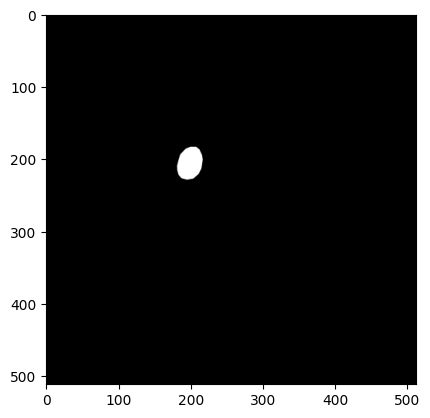

In [10]:
def viewOpticCup(image_path):

    image_path = 'optic-cup' + image_path

    print(image_path)

    # Load the image
    image = cv2.imread(image_path)

    # Convert the image from BGR to RGB color space
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('on')  # Hide the axis to only show the image
    plt.show()

viewOpticCup(data['fundus_oc_seg'][7890])

In [24]:
#removing the patients with no fundus classification and with fundus classification -1 instead of 0,1
fundus_subset = data[(data['fundus_oc_seg'].notnull()) & (data['types'] != -1)]

fundus_subset = fundus_subset[['types', 'fundus_oc_seg', 'names']]

fundus_subset['combined'] = fundus_subset['names'] + '.png'

fundus_subset['fundus_oc_seg'] = fundus_subset['fundus_oc_seg'].astype(str)

fundus_subset['types'] = fundus_subset['types'].astype(str)

fundus_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3035 entries, 4546 to 12048
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   types          3035 non-null   object
 1   fundus_oc_seg  3035 non-null   object
 2   names          3035 non-null   object
 3   combined       3035 non-null   object
dtypes: object(4)
memory usage: 118.6+ KB


In [25]:
fundus_subset['types'].value_counts()

types
0    2310
1     725
Name: count, dtype: int64

In [26]:
fundus_subset

,types,fundus_oc_seg,names,combined
4546,0,/optic-cup/ORIGA-1.png,ORIGA-1,ORIGA-1.png
4547,0,/optic-cup/ORIGA-2.png,ORIGA-2,ORIGA-2.png
4548,0,/optic-cup/ORIGA-3.png,ORIGA-3,ORIGA-3.png
4549,0,/optic-cup/ORIGA-4.png,ORIGA-4,ORIGA-4.png
4550,0,/optic-cup/ORIGA-5.png,ORIGA-5,ORIGA-5.png
...,...,...,...,...
12044,0,/optic-cup/PAPILA-484.png,PAPILA-484,PAPILA-484.png
12045,0,/optic-cup/PAPILA-485.png,PAPILA-485,PAPILA-485.png
12046,0,/optic-cup/PAPILA-486.png,PAPILA-486,PAPILA-486.png
12047,0,/optic-cup/PAPILA-487.png,PAPILA-487,PAPILA-487.png


In [27]:
# glaucoma fundus images
glaucomaCount = len(fundus_subset[(fundus_subset['types'] == '1')])
print("this is the glaucoma count", glaucomaCount)

# healthy fundus images
healthyCount = len(fundus_subset[(fundus_subset['types'] == '0')])
print("this is the healthy eyes count", healthyCount)

print('\nTotal fundus images to  be used: ', glaucomaCount + healthyCount)

# randomize data
fundus_subset_random = fundus_subset.sample(frac=1, random_state=1)

# create df for each class based on randomized data
healthy_subset = fundus_subset_random[fundus_subset_random['types'] == '0']
glaucoma_subset = fundus_subset_random[fundus_subset_random['types'] == '1']

testSize = 500
valSize = 500

# get train items
healthy_train = healthy_subset.head(healthyCount - testSize)
glaucoma_train = glaucoma_subset.head(glaucomaCount - testSize)
train = healthy_train._append(glaucoma_train)

# get val items
healthy_val = healthy_subset.tail(valSize)
glaucoma_val = glaucoma_subset.tail(valSize)
val = healthy_val._append(glaucoma_val)

# get test items
healthy_test = healthy_subset.tail(testSize)
glaucoma_test = glaucoma_subset.tail(testSize)
test = healthy_test._append(glaucoma_test)

this is the glaucoma count 725
this is the healthy eyes count 2310

Total fundus images to  be used:  3035


In [28]:
print("Train Size: ", len(train))
print("Test Size: ", len(test))

Train Size:  2035
Test Size:  1000


In [29]:
import tensorflow as tf; print(tf.config.list_physical_devices('GPU'))


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2023-12-27 15:29:24.026803: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-27 15:29:24.087922: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-27 15:29:24.088686: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.


In [32]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.experimental.preprocessing import Rescaling
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.mobilenet_v3 import preprocess_input 


# Set target size and batch size for data generator
target = 224
batchSize = 8

# Set the class mode to 'binary' for training data generator
classes = 'binary'

with tf.device('/GPU:0'):


    # Create the training data generator
    trainDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    trainGen = trainDataGen.flow_from_dataframe(dataframe=train, 
                                                directory='optic-cup/optic-cup/', 
                                                class_mode = classes,
                                                batch_size = batchSize, 
                                                shuffle=True, 
                                                x_col="combined", 
                                                y_col="types", 
                                                validate_filenames=True, 
                                                target_size=(target, target), 
                                                color_mode='rgb')


    # Create the validation data generator
    valDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    valGen = valDataGen.flow_from_dataframe(dataframe=val,
                                            directory='optic-cup/optic-cup/',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')


    # Create the testing data generator
    testDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    testGen = testDataGen.flow_from_dataframe(dataframe=test,
                                            directory='optic-cup/optic-cup/',   
                                            batch_size = batchSize, 
                                            class_mode = classes,
                                            shuffle=False, 
                                            x_col="combined", 
                                            y_col="types", 
                                            validate_filenames=True, 
                                            target_size=(target, target), 
                                            color_mode='rgb')

Found 1883 validated image filenames belonging to 2 classes.


/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 152 invalid image filename(s) in x_col="combined". These filename(s) will be ignored.
  warnings.warn(


Found 923 validated image filenames belonging to 2 classes.


/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 77 invalid image filename(s) in x_col="combined". These filename(s) will be ignored.
  warnings.warn(


Found 923 validated image filenames belonging to 2 classes.


/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 77 invalid image filename(s) in x_col="combined". These filename(s) will be ignored.
  warnings.warn(


MODEL 1: Basic Glaucoma Detection using a support vector machine (SVM) classifier on the OPTIC DISK CUP pictures. The features were extracted using the MobileNetV3 model.

In [33]:
from keras.applications import MobileNetV3Small
from keras import Sequential

# Load pre-trained MobileNetV3 model
base_model = MobileNetV3Small(weights='imagenet', include_top=False, input_shape=(target, target, 3))

model = Sequential([
    base_model, layers.GlobalAveragePooling2D()
])

# Function to extract features using this model
def extract_features(generator, sample_count):
    features = np.zeros(shape=(sample_count, model.layers[-1].output.shape[1]))
    labels = np.zeros(shape=(sample_count))
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = model.predict(inputs_batch)
        features[i * batchSize: (i + 1) * batchSize] = features_batch
        labels[i * batchSize: (i + 1) * batchSize] = labels_batch
        i += 1
        if i * batchSize >= sample_count:
            break
    return features, labels

In [34]:
import numpy as np

train_features, train_labels = extract_features(trainGen, trainGen.samples)
val_features, val_labels = extract_features(valGen, valGen.samples)
test_features, test_labels = extract_features(testGen, testGen.samples)

2023-12-27 15:36:20.458944: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2023-12-27 15:36:28.471098: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-27 15:36:36.619543: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 0s 21ms/step


In [35]:
from sklearn.svm import SVC

with tf.device('/GPU:0'):

    # Create and train the SVM
    svm_model = SVC(kernel='linear')
    svm_model.fit(train_features, train_labels)

In [36]:
# Validate the SVM
val_accuracy = svm_model.score(val_features, val_labels)
print('Validation accuracy:', val_accuracy)

# Test the SVM
test_accuracy = svm_model.score(test_features, test_labels)
print('Test accuracy:', test_accuracy)

Validation accuracy: 0.5547128927410617
Test accuracy: 0.5547128927410617


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

test_predictions = svm_model.predict(test_features)

conf_matrix = confusion_matrix(test_labels, test_predictions)
class_report = classification_report(test_labels, test_predictions)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Print the classification report
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[457   1]
 [410  55]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.53      1.00      0.69       458
         1.0       0.98      0.12      0.21       465

    accuracy                           0.55       923
   macro avg       0.75      0.56      0.45       923
weighted avg       0.76      0.55      0.45       923



In [42]:
with tf.device('/GPU:0'):

    # Set class mode to 'sparse' for visualization data generators
    classes = 'sparse'

    # Create data generators for healthy and glaucoma subsets for visualization
    healthy_subsetDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    healthy_subset_Gen = trainDataGen.flow_from_dataframe(dataframe=healthy_subset, 
                                                directory='optic-cup/optic-cup/', 
                                                class_mode = classes,
                                                batch_size = batchSize, 
                                                shuffle=True, 
                                                x_col="combined", 
                                                y_col="types", 
                                                validate_filenames=True, 
                                                target_size=(target, target), 
                                                color_mode='rgb')


    glaucoma_subsetDataGen = ImageDataGenerator(preprocessing_function=preprocess_input)
    glaucoma_subset_Gen = glaucoma_subsetDataGen.flow_from_dataframe(dataframe=glaucoma_subset, 
                                                directory='optic-cup/optic-cup/', 
                                                class_mode = classes,
                                                batch_size = batchSize, 
                                                shuffle=True, 
                                                x_col="combined", 
                                                y_col="types", 
                                                validate_filenames=True, 
                                                target_size=(target, target), 
                                                color_mode='rgb')

Found 2140 validated image filenames belonging to 1 classes.


/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 170 invalid image filename(s) in x_col="combined". These filename(s) will be ignored.
  warnings.warn(


Found 666 validated image filenames belonging to 1 classes.


/root/anaconda3/envs/py310/lib/python3.10/site-packages/keras/src/preprocessing/image.py:1137: UserWarning: Found 59 invalid image filename(s) in x_col="combined". These filename(s) will be ignored.
  warnings.warn(


In [43]:
def show_images(gen):
    
    # return classes , images to be displayed
    g_dict = gen.class_indices        # defines dictionary {'class': index}
    classes = list(g_dict.keys())     # defines list of dictionary's kays (classes), classes names : string
    images, labels = next(gen)        # get a batch size samples from the generator

    # calculate number of displayed samples
    length = len(labels)        # length of batch size
    sample = min(length, 25)    # check if sample less than 25 images

    plt.figure(figsize= (20, 20))

    for i in range(sample):
        plt.subplot(4, 4, i + 1)
        image = images[i] / 255       # scales data to range (0 - 255)
        plt.imshow(image)
        index = np.argmax(labels[i])  # get image index
        class_name = classes[index]   # get class of image
        plt.title(class_name, color= 'blue', fontsize= 12)
        plt.axis('off')
    plt.show()

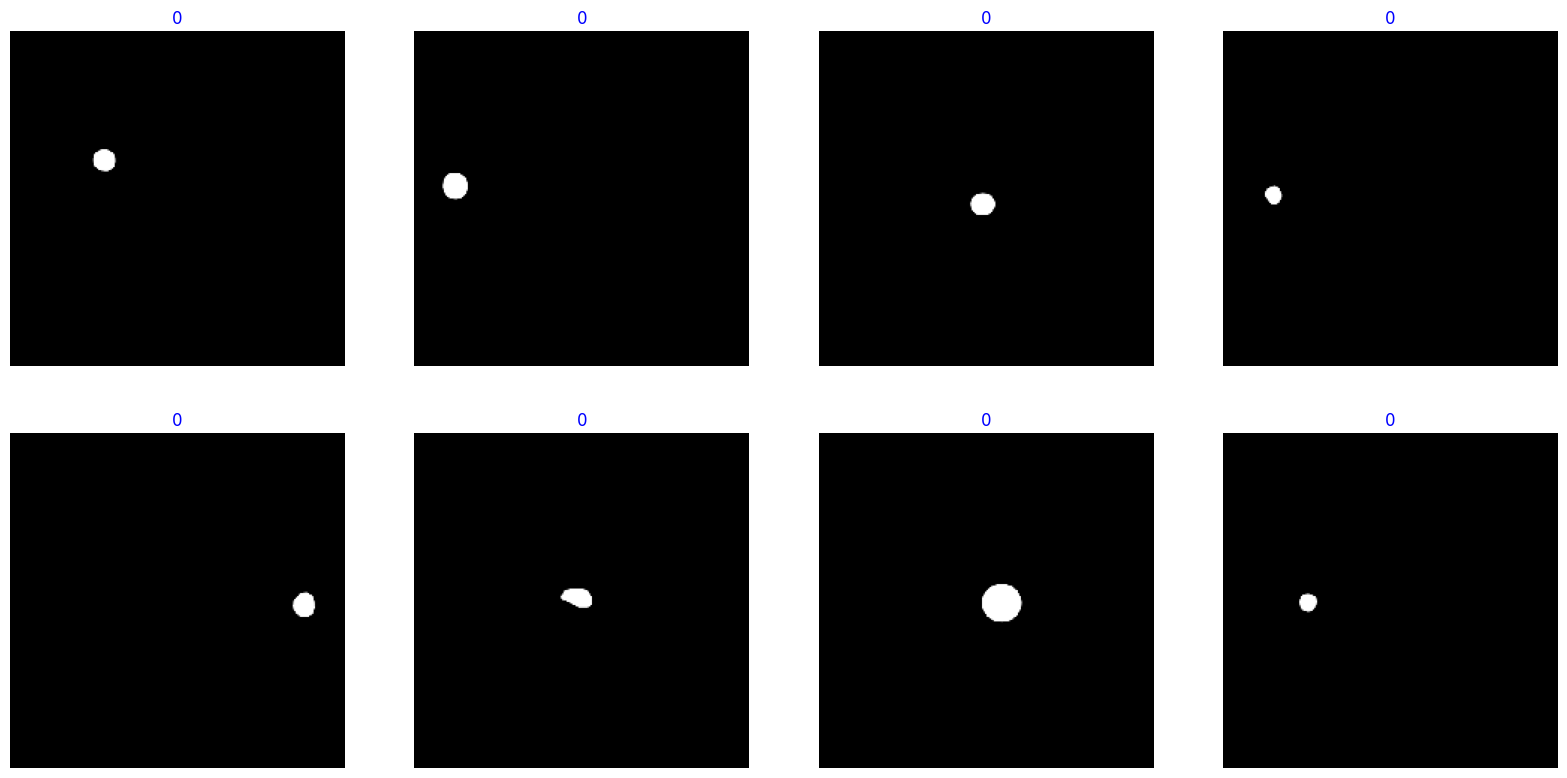

In [44]:
show_images(healthy_subset_Gen)

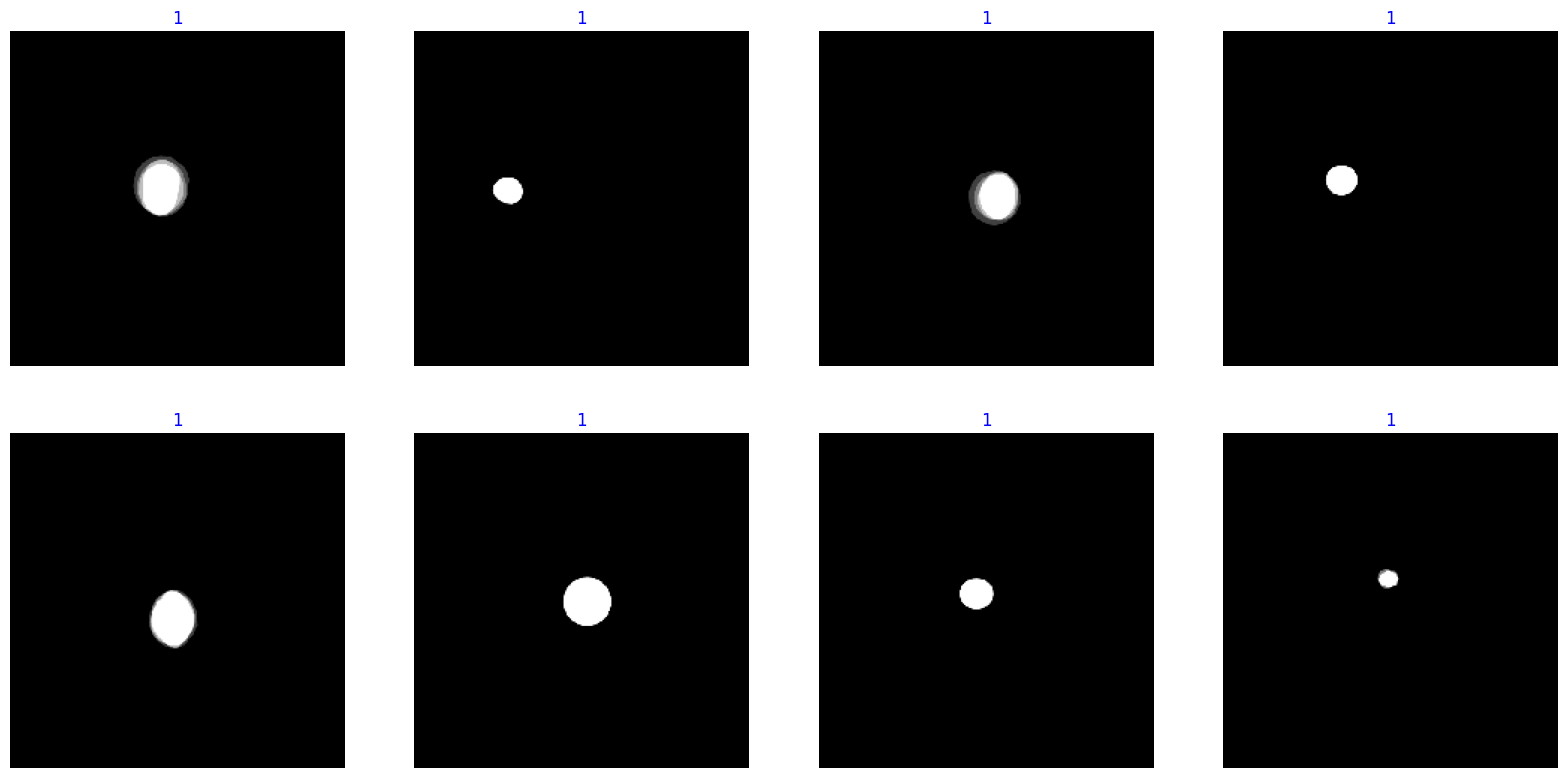

In [45]:
show_images(glaucoma_subset_Gen)

In [46]:
# # Plot the training and validation accuracy and loss
# import seaborn as sns
# sns.set()

# acc = r.history['accuracy']
# val_acc = r.history['val_accuracy']
# loss = r.history['loss']
# val_loss = r.history['val_loss']
# epochs = range(1, len(loss) + 1)

# #accuracy plot
# plt.plot(epochs, acc, color='green', label='Training Accuracy')
# plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
# plt.title('Training and Validation Accuracy')
# plt.ylabel('Accuracy')
# plt.xlabel('Epoch')
# plt.legend()

# plt.figure()
# #loss plot
# plt.plot(epochs, loss, color='green', label='Training Loss')
# plt.plot(epochs, val_loss, color='red', label='Validation Loss')
# plt.title('Training and Validation Loss')
# plt.xlabel('Epoch')
# plt.ylabel('Loss')
# plt.legend()

# plt.show()